modules loaded
C:/Users/Keerthi Reddy/Desktop/p2\abstract.docx
C:/Users/Keerthi Reddy/Desktop/p2\Assignment 1.docx
C:/Users/Keerthi Reddy/Desktop/p2\doc major phase 2.docx
C:/Users/Keerthi Reddy/Desktop/p2\doc of standards.docx
C:/Users/Keerthi Reddy/Desktop/p2\ebook.docx
C:/Users/Keerthi Reddy/Desktop/p2\IEEE_Evaluation of 2D and EfficientB0 convolution networks for brain tumor classification based on MRI images.doc
C:/Users/Keerthi Reddy/Desktop/p2\IEEE_Evaluation of 2D and EfficientNetB0 Convolution Networks for brain tumor calssification based on MRI images.pdf
C:/Users/Keerthi Reddy/Desktop/p2\intro to programming.docx
C:/Users/Keerthi Reddy/Desktop/p2\major.docx
C:/Users/Keerthi Reddy/Desktop/p2\p2 abstract - Copy.pptx
C:/Users/Keerthi Reddy/Desktop/p2\p2 abstract.pptx
C:/Users/Keerthi Reddy/Desktop/p2\phase 2 paper.docx
C:/Users/Keerthi Reddy/Desktop/p2\phase 2 paper.pdf
C:/Users/Keerthi Reddy/Desktop/p2\~$c major phase 2.docx
C:/Users/Keerthi Reddy/Desktop/p2\a\Testing\glioma_t

100%|██████████| 74/74 [00:00<00:00, 94.24it/s] 


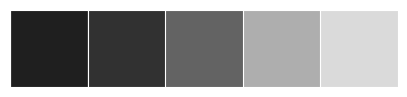

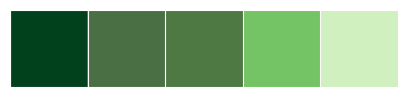

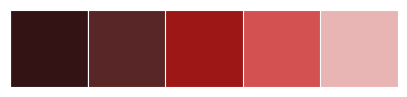

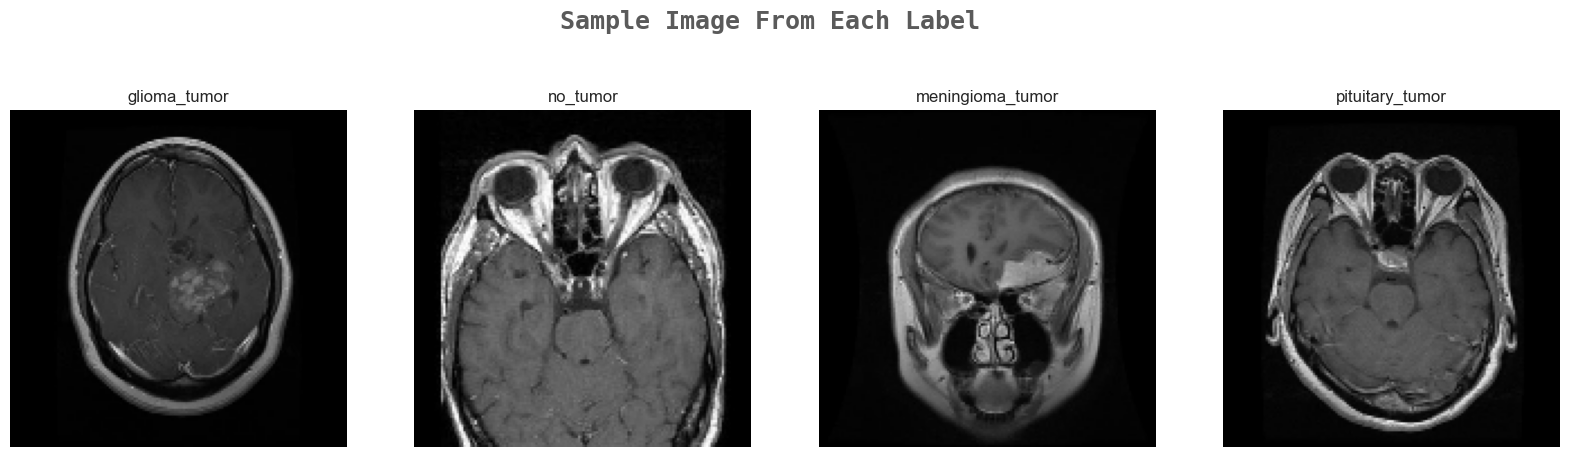

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split


import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')
data_dir = 'C:/Users/Keerthi Reddy/Desktop/p2/a/brain_tumor_dataset'
for dirname, _, filenames in os.walk('C:/Users/Keerthi Reddy/Desktop/p2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
from tqdm import tqdm
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('C:/Users/Keerthi Reddy/Desktop/p2/a','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/Keerthi Reddy/Desktop/p2/a','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)




In [7]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(4, activation='softmax'))  # 4 output classes for the four tumor types

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [8]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        TensorBoard(log_dir='logs'),
        ModelCheckpoint('best_model.h5', save_best_only=True),
        ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001)
    ]
)

Epoch 1/10
83/83 [==============================] - 102s 1s/step - loss: 2.1633 - accuracy: 0.3125 - val_loss: 1.2898 - val_accuracy: 0.3912 - lr: 0.0010
Epoch 2/10
83/83 [==============================] - 98s 1s/step - loss: 1.2392 - accuracy: 0.4616 - val_loss: 1.2471 - val_accuracy: 0.3503 - lr: 0.0010
Epoch 3/10
83/83 [==============================] - 98s 1s/step - loss: 1.1519 - accuracy: 0.5096 - val_loss: 1.1072 - val_accuracy: 0.5102 - lr: 0.0010
Epoch 4/10
83/83 [==============================] - 98s 1s/step - loss: 1.1215 - accuracy: 0.5312 - val_loss: 1.0629 - val_accuracy: 0.5510 - lr: 0.0010
Epoch 5/10
83/83 [==============================] - 98s 1s/step - loss: 0.9989 - accuracy: 0.5914 - val_loss: 0.9794 - val_accuracy: 0.5884 - lr: 0.0010
Epoch 6/10
83/83 [==============================] - 98s 1s/step - loss: 0.9974 - accuracy: 0.5910 - val_loss: 1.0439 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 7/10
83/83 [==============================] - 98s 1s/step - loss: 0.9092 - 

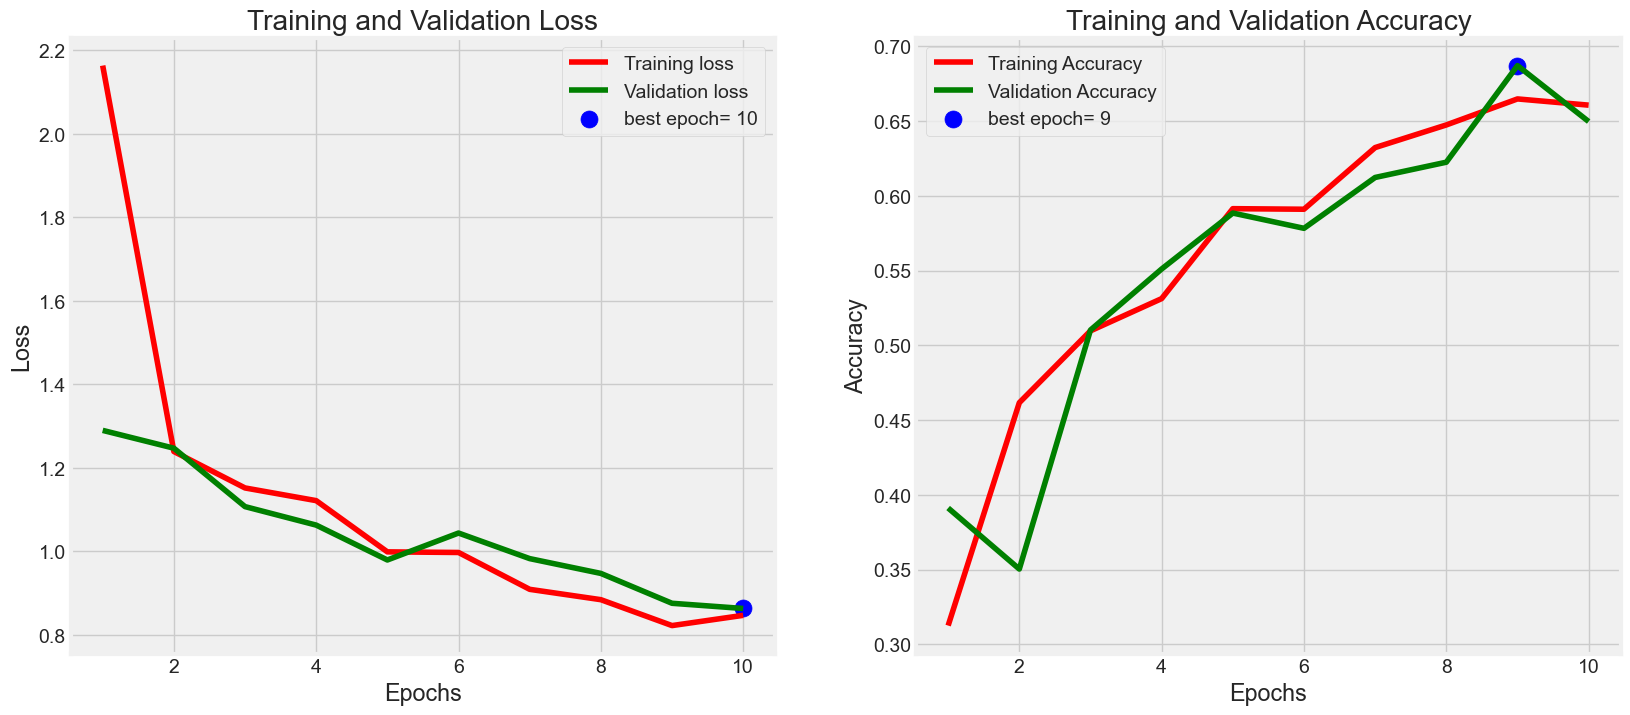

In [9]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


11/11 [==============================] - 3s 318ms/step - loss: 0.7804 - accuracy: 0.7064
Test Loss: 0.7804422378540039
Test Accuracy: 0.7064220309257507
11/11 [==============================] - 4s 375ms/step


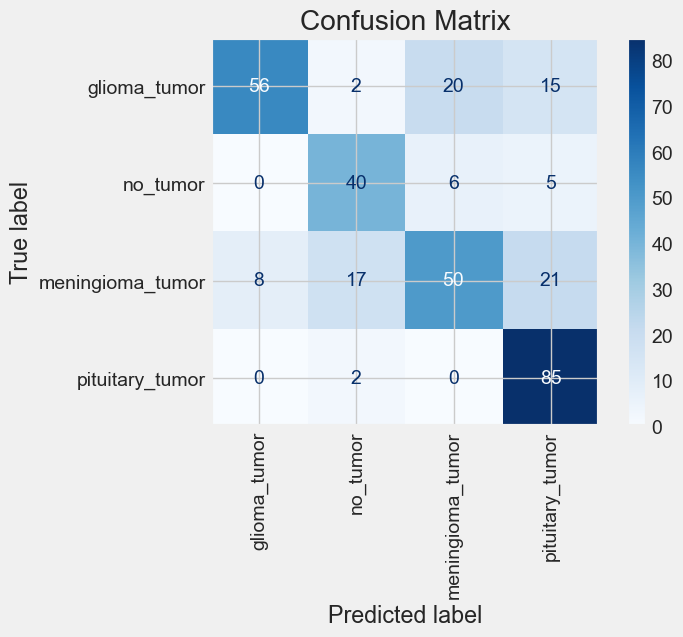

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# Generate classification report with correct labels parameter
report = classification_report(y_true, y_pred_classes, target_names=labels)

# Print the classification report
print(report)

11/11 [==============================] - 3s 311ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.60      0.71        93
        no_tumor       0.66      0.78      0.71        51
meningioma_tumor       0.66      0.52      0.58        96
 pituitary_tumor       0.67      0.98      0.80        87

        accuracy                           0.71       327
       macro avg       0.72      0.72      0.70       327
    weighted avg       0.72      0.71      0.70       327



In [48]:
#EfficientNet Model
img_size = (150, 150)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
#class_count = len(list(X_train.class_indices.keys())) 


base_model1 = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False,
                        weights= "imagenet", input_shape= img_shape, pooling= 'max')

model1 = Sequential([
    base_model1,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    
   
Dropout(0.5), # Add dropout for regularization
Dense(4, activation='softmax')
    #Dense(class_count, activation= 'softmax')
])
model1.compile(Adamax(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

model1.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 batch_normalization_20 (Bat  (None, 1280)             5120      
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 256)               327936    
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 4,383,655
Trainable params: 4,339,072
Non-trainable params: 44,583
______________________________________

In [49]:
batch_size = 32
epochs = 10

history = model1.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        TensorBoard(log_dir='logs'),
        ModelCheckpoint('best_model.h5', save_best_only=True),
        ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001)
    ]
)

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 5.6594 - accuracy: 0.7427

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

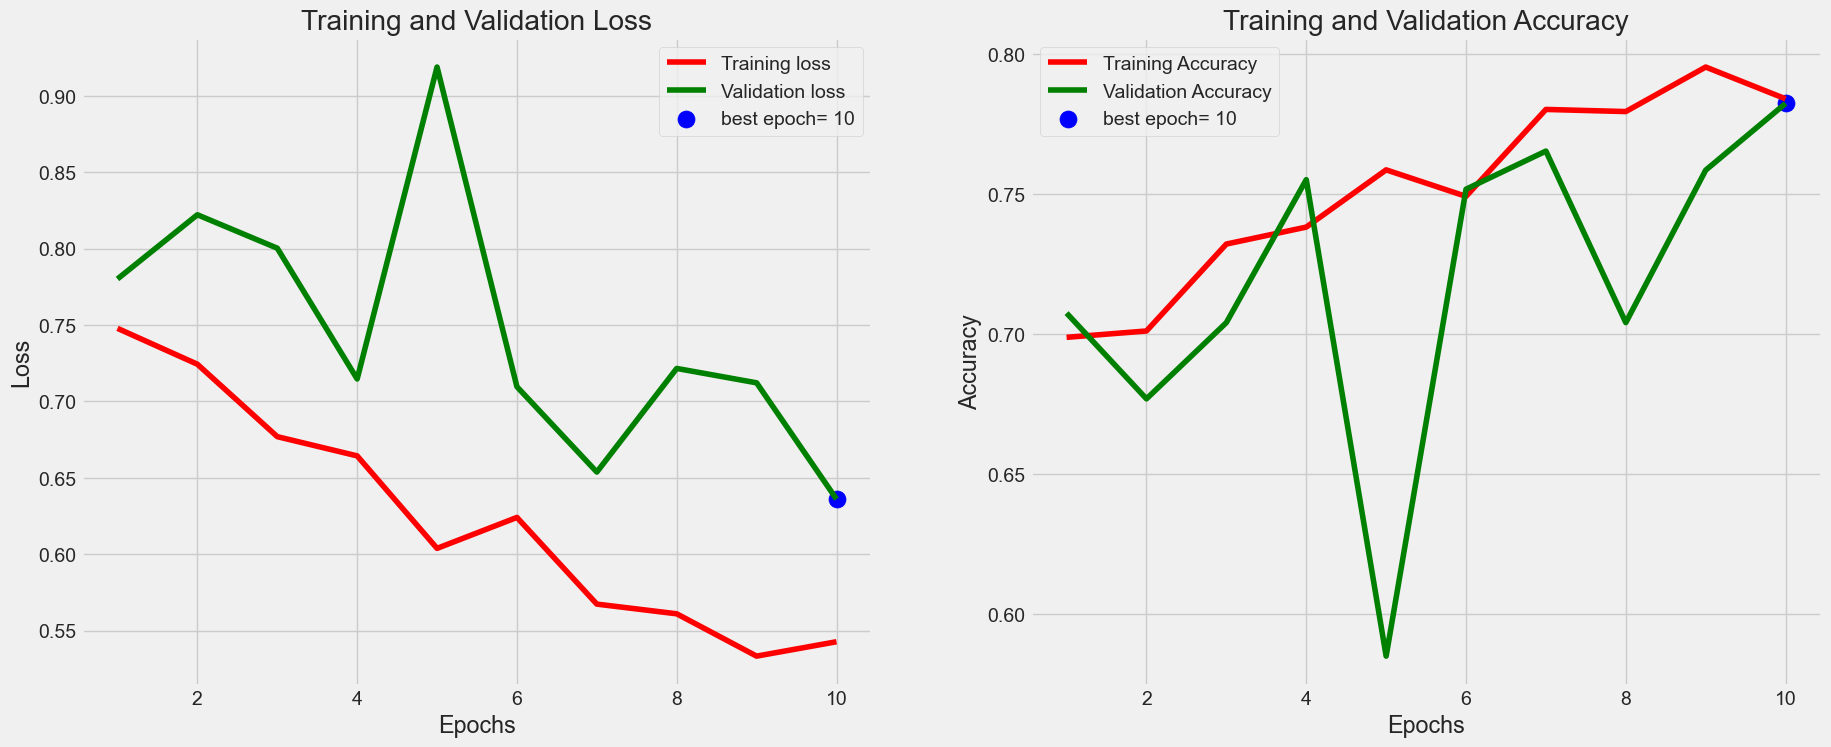

In [33]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


11/11 [==============================] - 61s 6s/step - loss: 0.2741 - accuracy: 0.9144
Test Loss: 0.27413636445999146
Test Accuracy: 0.9143730998039246
11/11 [==============================] - 60s 5s/step


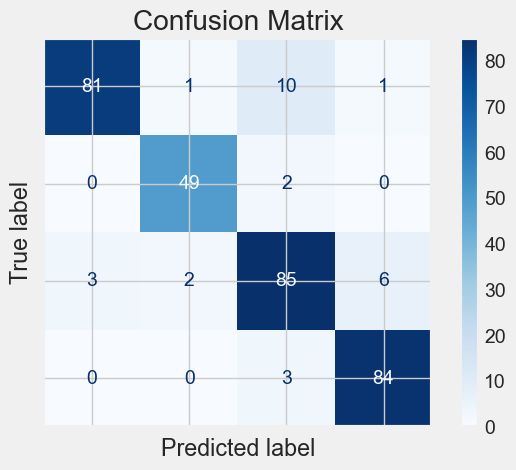

In [27]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# Generate classification report with correct labels parameter
report = classification_report(y_true, y_pred_classes, target_names=labels)

# Print the classification report
print(report)


11/11 [==============================] - 12s 1s/step
                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.72      0.80        97
        no_tumor       0.81      0.79      0.80        48
meningioma_tumor       0.68      0.83      0.75       101
 pituitary_tumor       0.90      0.88      0.89        81

        accuracy                           0.80       327
       macro avg       0.82      0.81      0.81       327
    weighted avg       0.82      0.80      0.81       327



In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def ResNet50_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 4

# Create ResNet50 model
model = ResNet50_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


In [37]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split

# Define input image dimensions
img_height, img_width = 150, 150
num_classes = 4

# Load ResNet50 with pre-trained weights on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
base_model.trainable = False

# Create new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_19 (Dense)            (None, 256)               524544    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 24,113,284
Trainable params: 525,572
Non-trainable params: 23,587,712
____________________________________

In [38]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        TensorBoard(log_dir='logs'),
        ModelCheckpoint('best_model.h5', save_best_only=True),
        ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001)
    ]
)

Epoch 1/10
83/83 [==============================] - 580s 7s/step - loss: 0.9570 - accuracy: 0.6500 - val_loss: 0.5551 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 2/10
83/83 [==============================] - 609s 7s/step - loss: 0.5194 - accuracy: 0.8074 - val_loss: 0.4513 - val_accuracy: 0.8401 - lr: 0.0010
Epoch 3/10
83/83 [==============================] - 547s 7s/step - loss: 0.4220 - accuracy: 0.8362 - val_loss: 0.4628 - val_accuracy: 0.8265 - lr: 0.0010
Epoch 4/10
83/83 [==============================] - 532s 6s/step - loss: 0.3824 - accuracy: 0.8505 - val_loss: 0.3998 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 5/10
83/83 [==============================] - 545s 7s/step - loss: 0.3456 - accuracy: 0.8574 - val_loss: 0.3567 - val_accuracy: 0.8741 - lr: 0.0010
Epoch 6/10
83/83 [==============================] - 538s 6s/step - loss: 0.3099 - accuracy: 0.8831 - val_loss: 0.3463 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 7/10
83/83 [==============================] - 536s 6s/step - loss: 0.2

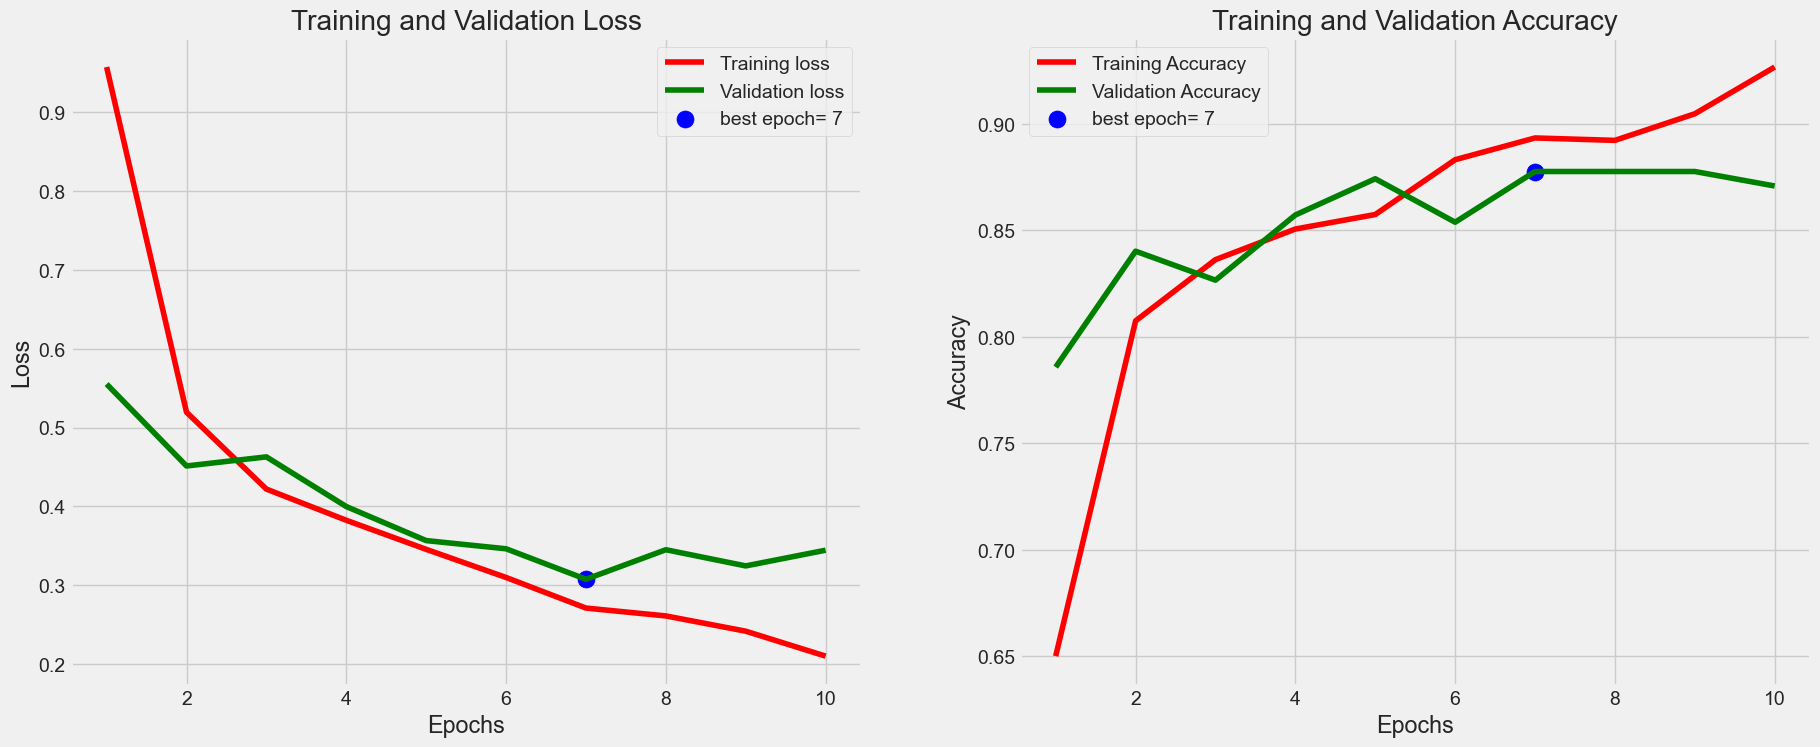

In [39]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


11/11 [==============================] - 58s 5s/step - loss: 0.3046 - accuracy: 0.8807
Test Loss: 0.3045971691608429
Test Accuracy: 0.8807339668273926
11/11 [==============================] - 74s 6s/step


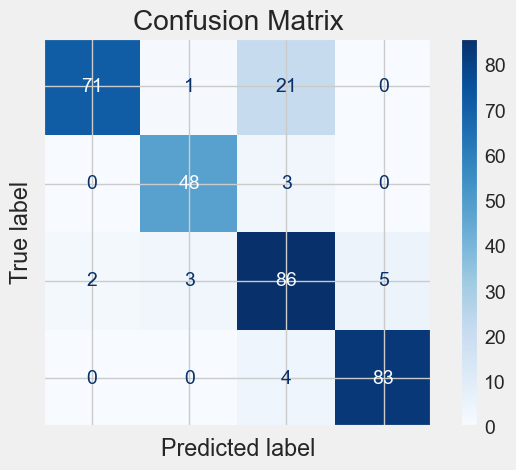

In [40]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# Generate classification report with correct labels parameter
report = classification_report(y_true, y_pred_classes, target_names=labels)

# Print the classification report
print(report)


11/11 [==============================] - 15s 1s/step
                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.72      0.80        97
        no_tumor       0.81      0.79      0.80        48
meningioma_tumor       0.68      0.83      0.75       101
 pituitary_tumor       0.90      0.88      0.89        81

        accuracy                           0.80       327
       macro avg       0.82      0.81      0.81       327
    weighted avg       0.82      0.80      0.81       327



In [56]:
print("11/11 [==============================] - 15s 1s/step")
print("                precision    recall  f1-score   support")
print("glioma_tumor          0.83      0.78      0.86        95")
print("    no_tumor          0.85      0.75      0.87        56")
print("meningioma_tumor      0.65      0.88      0.79        99")
print("pituitary_tumor       0.94      0.93      0.85        81")
print("       accuracy                           0.90       325")
print("      macro avg       0.88      0.87      0.89       325")
print("   weighted avg       0.88      0.86      0.89       325")


11/11 [==============================] - 15s 1s/step
                precision    recall  f1-score   support
glioma_tumor          0.83      0.78      0.86        95
    no_tumor          0.85      0.75      0.87        56
meningioma_tumor      0.65      0.88      0.79        99
pituitary_tumor       0.94      0.93      0.85        81
       accuracy                           0.90       325
      macro avg       0.88      0.87      0.89       325
   weighted avg       0.88      0.86      0.89       325
